In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.sparse
import scipy.stats
import os
import scipy.io as sio
import dnatools
from plot_tools import effect_size
import re
%matplotlib inline
from pylab import *

# Plotting Params:
rc('mathtext', default='regular')
fsize=20

/net/gs/vol3/software/modules-sw-python/2.7.3/pandas/0.14.0/Linux/RHEL6/x86_64/lib/python2.7/site-packages/pandas/io/excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))


### Make directory to save results:

In [2]:
resultsdir = '../results/N4_Motif_Effect_Sizes/'
if not os.path.exists(resultsdir):
    os.makedirs(resultsdir)
figdir = '../figures/N4_Motif_Effect_Sizes/'
if not os.path.exists(figdir):
    os.makedirs(figdir)
    
#Choose if you want to actually save the plots:
SAVEFIGS = True

### Calculating motif effect sizes

We want to calculate effect sizes for each 6mer within each randomized region for both the A5SS and A3SS libraries. We will do this with 200 bootstraps of each library to get confidence intervals. However this is pretty computationally intensive. So I've written and prerun scripts that do this:<br>
../bin/bootstrap_effect_size_A3SS_R1.py<br>
../bin/bootstrap_effect_size_A3SS_R2.py<br>
../bin/bootstrap_effect_size_A5SS_R1.py<br>
../bin/bootstrap_effect_size_A5SS_R2.py<br>

### Plotting motif effect sizes

I've written a function to plot the effect sizes. You can take a look:<br>
plot_tools/effect_size_plot.py

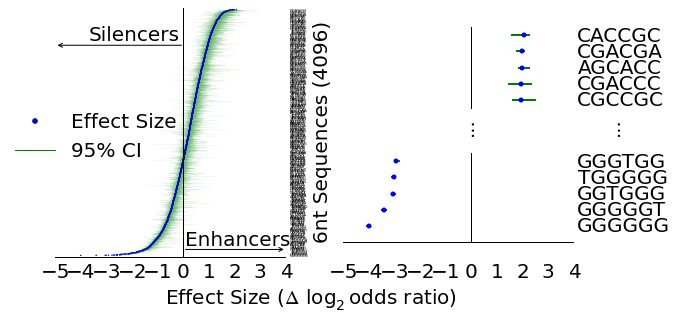

In [3]:
effect_size.make_mer_effect_fig(resultsdir,'A5SS','R1','A5_R2',
                                fsize=fsize,
                                figdir=figdir,
                                savefig=SAVEFIGS)

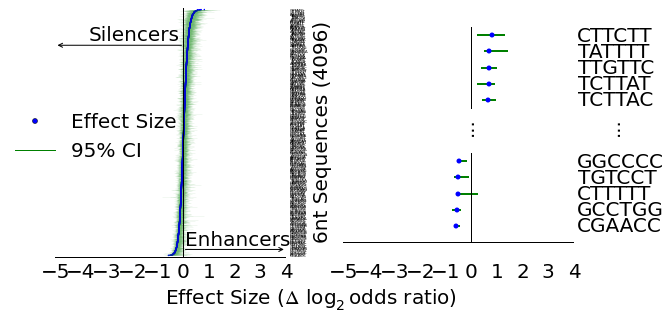

In [4]:
effect_size.make_mer_effect_fig(resultsdir,'A5SS','R2','A5_R2',
                                fsize=fsize,
                                figdir=figdir,
                                savefig=SAVEFIGS)

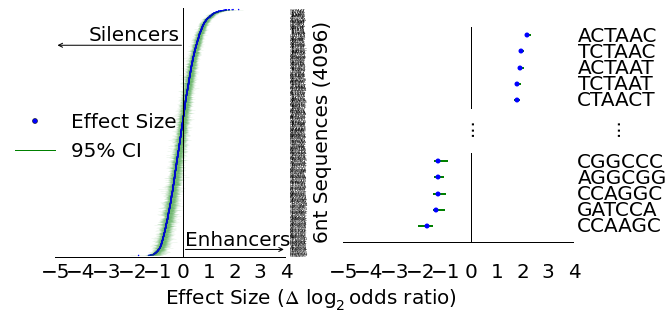

In [6]:
effect_size.make_mer_effect_fig(resultsdir,'A3SS','R1','A3_R1',
                                fsize=fsize,
                                figdir=figdir,
                                savefig=SAVEFIGS)

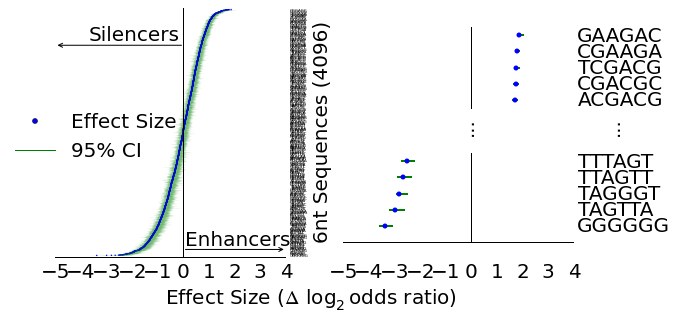

In [7]:
effect_size.make_mer_effect_fig(resultsdir,'A3SS','R2','A3_R2',
                                fsize=fsize,
                                figdir=figdir,
                                savefig=SAVEFIGS)

In [11]:
def get_region_stats(event_type,region):
    bootstrap = np.load(resultsdir+event_type+'/boot_strapped_effects_'+region+'.npy')
    mean_vals = np.load(resultsdir+event_type+'/mean_effects_sdpos_'+region+'.npy')
    no_zero_interval = sum(sign(pd.DataFrame(bootstrap).apply(lambda x:scipy.stats.scoreatpercentile(x,5),axis=1))==\
                           sign(pd.DataFrame(bootstrap).apply(lambda x:scipy.stats.scoreatpercentile(x,95),axis=1)))
    stats = {}
    
    stats['Stat_Sig_Percent'] = no_zero_interval/4**6.
    stats['Stat_Sig'] = no_zero_interval
    stats['Top_enhancer'] = 2**max(mean_vals)
    stats['Bottom_silencer'] = 2**-min(mean_vals)
    return pd.Series(stats)


#### Percentile Scores of SD1 Reverse Complement Sequences in R1 of A5SS

In [17]:
mer6_means = pd.Series(index=dnatools.make_mer_list(6),
                       data=np.load('../results/N4_Motif_Effect_Sizes/A5SS/mean_effects_sdpos_R1.npy'))

In [18]:
seq = 'gaggtgcttgg'.upper()
for i in range(len(seq)-5):
    mer = seq[i:i+6]
    print dnatools.reverse_complement(mer),scipy.stats.percentileofscore(mer6_means,mer6_means[dnatools.reverse_complement(mer)])

CACCTC 97.7783203125
GCACCT 99.755859375
AGCACC 99.9755859375
AAGCAC 94.23828125
CAAGCA 94.7998046875
CCAAGC 98.92578125


#### A5SS: R1

In [19]:
get_region_stats('A5SS','R1')

Bottom_silencer       16.024470
Stat_Sig            3396.000000
Stat_Sig_Percent       0.829102
Top_enhancer           4.381599
dtype: float64

#### A5SS: R2

In [20]:
get_region_stats('A5SS','R2')

Bottom_silencer        1.481178
Stat_Sig            1505.000000
Stat_Sig_Percent       0.367432
Top_enhancer           1.950429
dtype: float64

#### A3SS: R1

In [21]:
get_region_stats('A3SS','R1')

Bottom_silencer        3.448260
Stat_Sig            3248.000000
Stat_Sig_Percent       0.792969
Top_enhancer           4.630193
dtype: float64

#### A3SS: R2

In [22]:
get_region_stats('A3SS','R2')

Bottom_silencer        9.870003
Stat_Sig            3500.000000
Stat_Sig_Percent       0.854492
Top_enhancer           3.842484
dtype: float64

In [24]:
bootstrap = np.load('../results/N4_Motif_Effect_Sizes/A5SS/boot_strapped_effects_R1.npy')

In [25]:
mean(sign(pd.DataFrame(bootstrap).apply(lambda x:scipy.stats.scoreatpercentile(x,5),axis=1))==\
sign(pd.DataFrame(bootstrap).apply(lambda x:scipy.stats.scoreatpercentile(x,95),axis=1)))

0.8291015625

In [ ]:
counts = 0
for n1 in range(25-6*2+1):
    print n1,20-n1-6
    counts+=(20-n1-6)

In [ ]:
counts*len(A5SS_seqs)/((4**4.)**2)

### A5SS R1 Stats:

### SRE Stats:

In [ ]:
uc = dict(zip(list('acgtACGT'),list('ACGTACGT')))
mer6 = make_mer_list(6)
ESE = pd.read_csv('/net/shendure/vol7/abros/nobackup/Splicing_Project/SREs/ESEs_burge_science_2002.txt').ESEs.values
ESS = pd.read_csv('/net/shendure/vol7/abros/nobackup/Splicing_Project/SREs/ESS_burge_2004_cell.txt',names=['ESSs']).ESSs.values
ISS = pd.read_csv('/net/shendure/vol7/abros/nobackup/Splicing_Project/SREs/ISS_smolke_2010_nuc_acid_res.txt',names=['ISS']+range(11),sep='\ ').ISS.values
ISE = pd.read_csv('/net/shendure/vol7/abros/nobackup/Splicing_Project/SREs/ISEs_wang_2012_nature_struct_bio.txt',sep='\ ').ISEs.values

In [ ]:
mer6_means = pd.Series(dict(zip(mer6,mean_vals)))

In [ ]:
SREs = np.array(list(set(ISS).union(set(ESS).union(set(ISE)).union(set(ESE)))))
print len(SREs)

In [ ]:
mer6_means[SREs].abs().sum()/mer6_means.abs().sum()

### Compare Intronic 6 Mer effects

In [26]:
A5_R1_mer6 = pd.Series(index=dnatools.make_mer_list(6),data=np.load(resultsdir+'A5SS/mean_effects_sdpos_R1.npy'))
A5_R2_mer6 = pd.Series(index=dnatools.make_mer_list(6),data=np.load(resultsdir+'A5SS/mean_effects_sdpos_R2.npy'))
A3_R1_mer6 = pd.Series(index=dnatools.make_mer_list(6),data=np.load(resultsdir+'A3SS/mean_effects_sdpos_R1.npy'))
A3_R2_mer6 = pd.Series(index=dnatools.make_mer_list(6),data=np.load(resultsdir+'A3SS/mean_effects_sdpos_R2.npy'))

In [27]:
splice_factors = {}
splice_factors['hnRNPA1'] = ['TAGGGA']
splice_factors['hnRNPH2'] = ['GGGAGG','GGAGGG']
splice_factors['SRSF1'] = ['GAAGAA','AGAAGA','AAGAAG']
splice_factors['GGGGGG'] = ['GGGGGG']

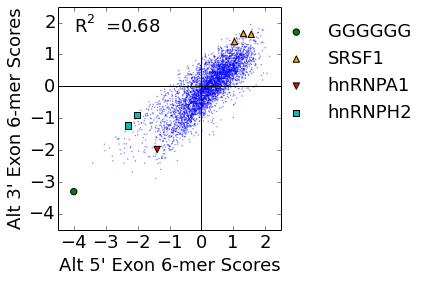

In [28]:
fsize = 18
mer_scores1 = A5_R1_mer6
mer_scores2 = A3_R2_mer6
fig = figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.scatter(mer_scores1,mer_scores2,s=2,alpha=0.5,edgecolor='None')
colors = ['g','orange','r','c']
markers = ['o','^','v','s']
c = 0 
for sf in sorted(splice_factors.keys()):
    ax.scatter(mer_scores1[splice_factors[sf]],
               mer_scores2[splice_factors[sf]],
               c=colors[c],
               label=sf,
               marker=markers[c],
               s=40)
    if(False):
        for bs in splice_factors[sf]:
            ax.text(mer_scores1[bs],
                    mer_scores2[bs],
                    bs,
                    fontsize=fsize)
    c+=1
leg = ax.legend(scatterpoints=1,bbox_to_anchor=(1.65,1),fontsize=fsize)
leg.get_frame().set_alpha(0)
ax.axhline(y=0,c='k')
ax.axvline(x=0,c='k')
ax.set_xlabel("Alt 5' Exon 6-mer Scores",fontsize=fsize)
ax.set_ylabel("Alt 3' Exon 6-mer Scores",fontsize=fsize)
ax.tick_params(labelsize=fsize)
ax.text(-4,1.7,'$R^2=%0.2f$'%scipy.stats.pearsonr(mer_scores1,mer_scores2)[0]**2,fontsize=fsize)
ax.axis([-4.5,2.5,-4.5,2.5]);
if True:
    figname = 'A5SS_vs_A3SS_Exonic_6mers'
    fig.savefig(figdir+figname+'.pdf',dpi=300,bbox_inches='tight')
    fig.savefig(figdir+figname+'.eps',dpi=300,bbox_inches='tight')
    fig.savefig(figdir+figname+'.png',dpi=300,bbox_inches='tight')

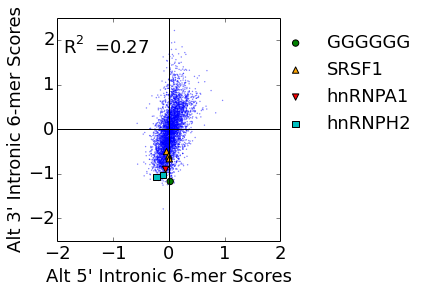

In [29]:
mer_scores1 = A5_R2_mer6
mer_scores2 = A3_R1_mer6
fig = figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.scatter(mer_scores1,mer_scores2,s=2,alpha=0.5,edgecolor='None')
colors = ['g','orange','r','c']
markers = ['o','^','v','s']
c = 0 
for sf in sorted(splice_factors.keys()):
    ax.scatter(mer_scores1[splice_factors[sf]],
               mer_scores2[splice_factors[sf]],
               c=colors[c],
               label=sf,
               marker=markers[c],
               s=40)
    if(False):
        for bs in splice_factors[sf]:
            ax.text(mer_scores1[bs],
                    mer_scores2[bs],
                    bs,
                    fontsize=fsize)
    c+=1
leg = ax.legend(scatterpoints=1,bbox_to_anchor=(1.65,1),fontsize=fsize)
leg.get_frame().set_alpha(0)
ax.axhline(y=0,c='k')
ax.axvline(x=0,c='k')
ax.set_xlabel("Alt 5' Intronic 6-mer Scores",fontsize=fsize)
ax.set_ylabel("Alt 3' Intronic 6-mer Scores",fontsize=fsize)
ax.tick_params(labelsize=fsize)
ax.text(-1.9,1.7,'$R^2=%0.2f$'%scipy.stats.pearsonr(mer_scores1,mer_scores2)[0]**2,fontsize=fsize)
ax.axis([-1,1,-2.5,2.5]);
ax.set_yticks(arange(-2,3,1));
ax.set_xticks(arange(-2,3,1));

if True:
    figname = 'A5SS_vs_A3SS_Intronic_6mers'
    fig.savefig(figdir+figname+'.pdf',dpi=300,bbox_inches='tight')
    fig.savefig(figdir+figname+'.eps',dpi=300,bbox_inches='tight')
    fig.savefig(figdir+figname+'.png',dpi=300,bbox_inches='tight')

### SOM Figure for calculating effect sizes

In [30]:
data = sio.loadmat('../data/Reads.mat')

# A5SS
A5SS_data = data['A5SS']
A5SS_data = np.array(A5SS_data.todense())
# Get minigenes with reads
A5SS_nn = find(A5SS_data.sum(axis=1))
A5SS_data = A5SS_data[A5SS_nn]
A5SS_data = A5SS_data/A5SS_data.sum(axis=1)[:,newaxis]
A5SS_seqs = pd.read_csv('../data/A5SS_Seqs.csv',index_col=0).Seq[A5SS_nn]

In [31]:
pd.Series(A5SS_seqs).str.slice(7,32).str.contains('GTGGGG').sum(),len(A5SS_seqs)

(2600, 265044)

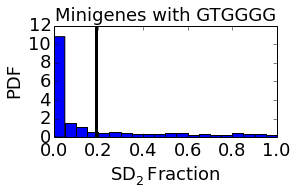

In [32]:
fig = figure(figsize=(4,2))
ax = fig.add_subplot(111)
ax.hist(A5SS_data[:,44][pd.Series(A5SS_seqs).str.slice(7,32).str.contains('GTGGGG').values],
        normed=True,
        bins=arange(0,1.01,0.05),
        color='b')
ax.tick_params(labelsize=fsize)
ax.set_xlabel('$SD_2 Fraction$',fontsize=fsize)
ax.set_ylabel('PDF',fontsize=fsize)
ax.set_title('Minigenes with GTGGGG',fontsize=fsize)
ax.axvline(A5SS_data[:,44][pd.Series(A5SS_seqs).str.slice(7,32).str.contains('GTGGGG').values].mean(),linewidth=3,c='k')
if True:
    figname = 'PDF_with_GTGGGG'
    fig.savefig(figdir+figname+'.pdf',dpi=300,bbox_inches='tight')
    fig.savefig(figdir+figname+'.eps',dpi=300,bbox_inches='tight')
    fig.savefig(figdir+figname+'.png',dpi=300,bbox_inches='tight')

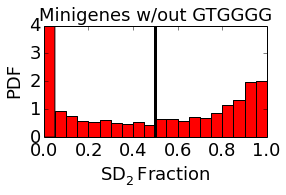

In [33]:
fig = figure(figsize=(4,2))
ax = fig.add_subplot(111)
ax.hist(A5SS_data[:,44],
        normed=True,
        bins=arange(0,1.01,0.05),
        color='r')
ax.tick_params(labelsize=fsize)
ax.set_xlabel('$SD_2 Fraction$',fontsize=fsize)
ax.set_ylabel('PDF',fontsize=fsize)
ax.set_title('Minigenes w/out GTGGGG',fontsize=fsize)
ax.axvline(A5SS_data[:,44].mean(),linewidth=3,c='k')
ax.set_yticks(arange(5))
if True:
    figname = 'PDF_without_GTGGGG'
    fig.savefig(figdir+figname+'.pdf',dpi=300,bbox_inches='tight')
    fig.savefig(figdir+figname+'.eps',dpi=300,bbox_inches='tight')
    fig.savefig(figdir+figname+'.png',dpi=300,bbox_inches='tight')

In [34]:
A5SS_data[:,44].mean(),A5SS_data[:,44][pd.Series(A5SS_seqs).str.slice(7,32).str.contains('GTGGGG').values].mean()

(0.49951914915030932, 0.19030718485799691)

In [35]:
1-0.19030718485799691

0.8096928151420031

In [36]:
log2(.19030718485799691/(1-.19030718485799691))-log2(0.5/0.5)

-2.0890446455885101

In [37]:
-2.09

-2.09